## K-Mean Clustering in Python 

Machine Learning can broadly be classified into three types: 1. Supervised Learning, 2. Unsupervised Learning and 3. Semi-supervised Learning.

K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible.
The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid.

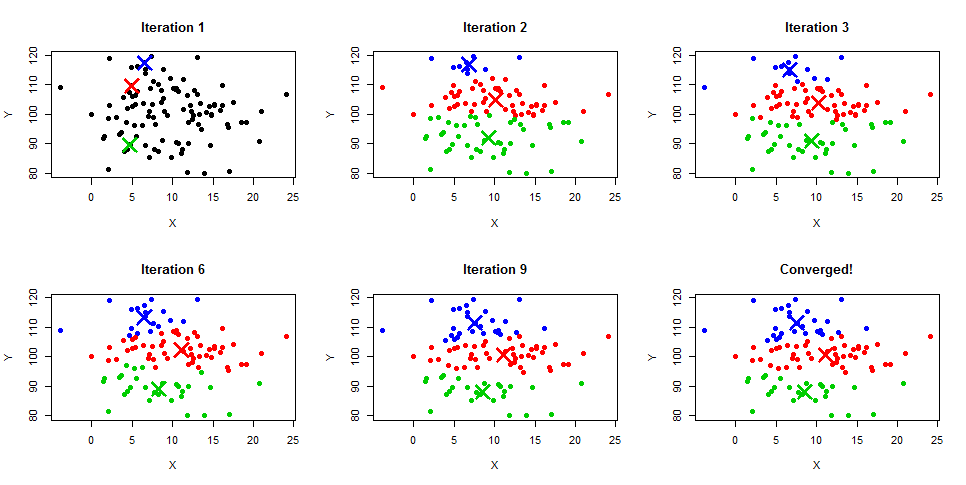

## Type of Clustering

- Hard clustering
- Soft clustering

## Type of Clustering Algorithms

Connectivity-based clustering: the main idea behind this clustering is that data points that are closer in the data space are more related (similar) than to data points farther away. They are also not very robust towards outliers, which might show up as additional clusters or even cause other clusters to merge.

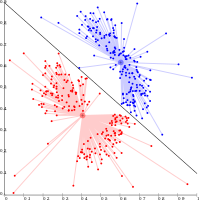

Centroid-based clustering: in this type of clustering, clusters are represented by a central vector or a centroid. This centroid might not necessarily be a member of the dataset.

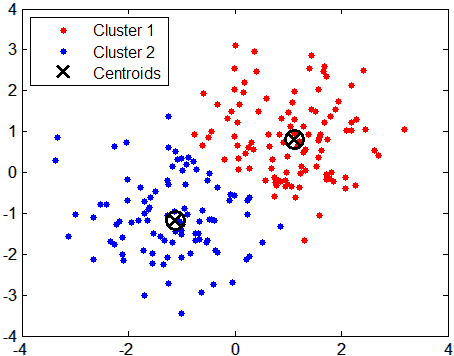

Distribution-based clustering: These models have a strong theoritical foundation, however they often suffer from overfitting. Gaussian mixture models, using the expectation-maximization algorithm is a famous distribution based clustering method.

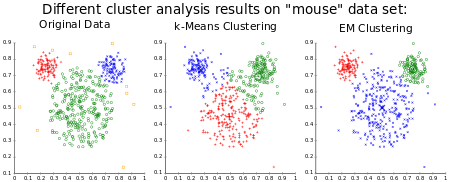

Density-based methods search the data space for areas of varied density of data points.

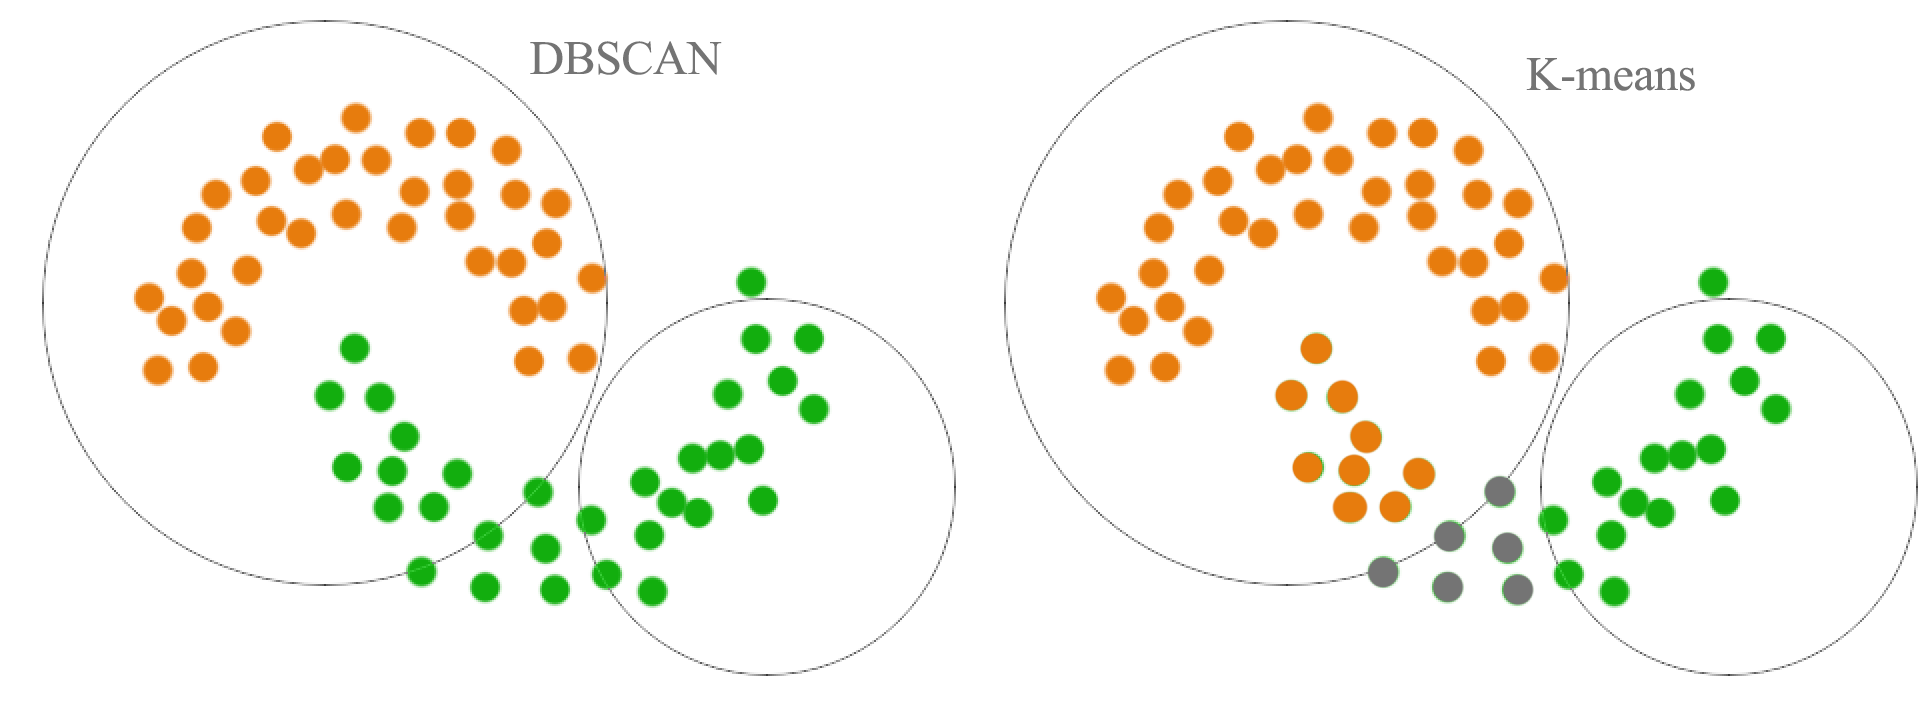

## Dataset and Problem Understanding 

In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [136]:
data = pd.read_csv('data.csv', index_col = 0)
data.head()

,x,y,cluster
0,-8.482852,-5.603349,2
1,-7.751632,-8.405334,2
2,-10.967098,-9.032782,2
3,-11.999447,-7.606734,2
4,-1.736810,10.478015,1


In [137]:
data['cluster'].value_counts()

1    67
0    67
2    66
Name: cluster, dtype: int64

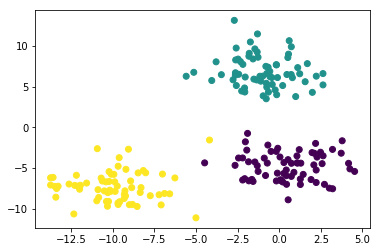

In [138]:
plt.scatter(data['x'], data['y'], c = data['cluster'], cmap = 'viridis')

### Do clustering 

In [139]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [140]:
X = data[['x', 'y']]
y = data['cluster']

In [141]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-1.01200363, -0.60606415],
       [-0.86550679, -1.04265203],
       [-1.5097118 , -1.14041707],
       [-1.71653856, -0.91821912],
       [ 0.33953731,  1.89963378],
       [ 0.38183922,  1.1890842 ],
       [ 0.24668446, -0.74232845],
       [-1.44313178, -0.76182643],
       [ 0.32130834, -0.75849023],
       [ 0.83110494,  1.27684537],
       [ 0.31775088, -0.39338956],
       [ 1.20365218, -0.4290876 ],
       [-0.07305683,  1.51966781],
       [ 0.63827173,  0.98134203],
       [ 1.52205697, -0.42280098],
       [ 0.17043691,  1.06578799],
       [ 1.5381542 , -0.52935538],
       [ 0.27161133, -0.71651135],
       [-1.35289151, -0.93641563],
       [ 0.79308339, -0.35212834],
       [ 0.14633873,  2.31330628],
       [ 1.14228061, -0.30354302],
       [ 1.12503491, -0.04177872],
       [-1.17977302, -1.09578279],
       [-2.01238779, -0.86540408],
       [ 0.19152374,  1.57228952],
       [ 0.83261025,  1.80799546],
       [ 0.66508288, -0.6110459 ],
       [-1.12827817,

In [142]:
data[['x', 'y']] = X

In [143]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [144]:
center = kmeans.cluster_centers_
center

array([[ 0.63701655,  0.42500526],
       [-1.32303438, -0.88270323]])

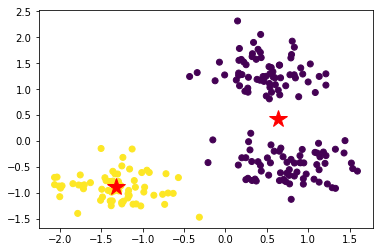

In [145]:
plt.scatter(data['x'], data['y'], c = kmeans.labels_, cmap = 'viridis')
for i, point in enumerate(center):
    plt.plot(center[i][0], center[i][1], '*r--', linewidth=2, markersize=18)


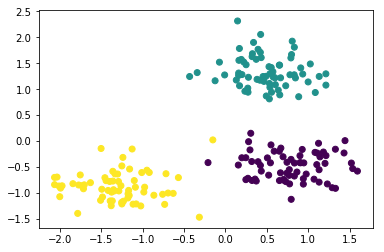

In [146]:
plt.scatter(data['x'], data['y'], c = data['cluster'], cmap = 'viridis')

### How do I choose right value of k? 

you need to understand how it works?

assuming we have inputs x_1, x_2, x_3, ..., x_nx

- Step 1 - Pick K random points as cluster centers called centroids.
- Step 2 - Assign each x_i to nearest cluster by calculating its distance to each centroid.
- Step 3 - Find new cluster center by taking the average of the assigned points.
- Step 4 - Repeat Step 2 and 3 until none of the cluster assignments change.

<img src="https://i.imgur.com/k4XcapI.gif">

##### Most important, when to stop increasing K? 

We often know the value of K. In that case we use the value of K. Else we use the Elbow Method.

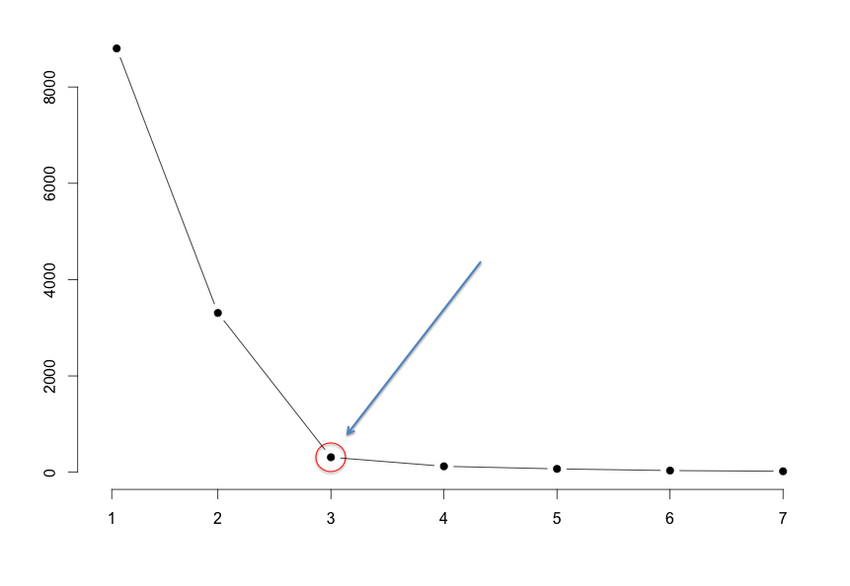

We run the algorithm for different values of K(say K = 10 to 1) and plot the K values against SSE(Sum of Squared Errors). And select the value of K for the elbow point as shown in the figure.

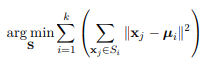

In [147]:
SSE = []
index = range(1,10)
for i in index:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)
    print(kmeans.inertia_)

400.0000000000001
156.41033617954912
44.05704845329278
36.85585101890133
30.98979911778676
25.240846029379913
22.70858764162133
19.8502123581499
17.33673390955418


Text(0, 0.5, 'SEE')

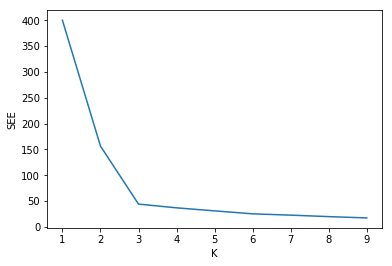

In [148]:
plt.plot(index, SSE)
plt.xlabel('K')
plt.ylabel('SEE')

### Let's go ahead and explore it in a little bit more detail 

Use Iris dataset 

In [149]:
from sklearn import datasets

In [150]:
iris = datasets.load_iris()

In [151]:
X = iris.data

In [152]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [153]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [154]:
X

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [155]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [156]:
SSE = []
index = range(1,10)
for i in index:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)
    print(kmeans.inertia_)

600.0
222.36170496502308
139.82049635974982
114.09254690403091
90.80728315078541
80.03687480296512
70.71964344225337
62.56490859983995
54.82772055803483


Text(0, 0.5, 'SSE')

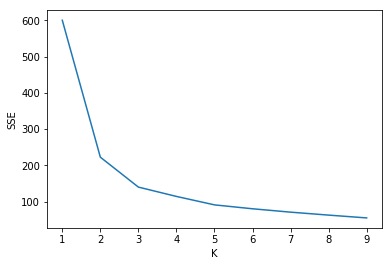

In [157]:
plt.plot(index, SSE)
plt.xlabel('K')
plt.ylabel('SSE')